In [1]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
%matplotlib inline
DATA_DIR = path.join('..', 'data')

In [16]:
results = pd.read_csv(path.join(DATA_DIR, 'results.csv'),
                      names=['Init_station','Init_time','Init_count','Count_type']+list(range(7000)))
# results.reset_index(inplace=True)
# column_names = list(results.columns[-4:])
# column_names.extend(str(i) for i in range(len(results.columns)-4))
# results.columns = column_names
results.set_index(list(results.columns[:4]), inplace=True)
results.head()

0             1     \
Init_station Init_time Init_count Count_type                            
0            0         1          S           7947054.0  7.947054e+06   
                                  I                 1.0  1.006943e+00   
                                  R                 0.0  1.388889e-02   
             24        1          S           7947054.0  7.947054e+06   
                                  I                 1.0  1.006943e+00   

                                                      2             3     \
Init_station Init_time Init_count Count_type                               
0            0         1          S           7.947054e+06  7.947054e+06   
                                  I           1.013934e+00  1.020973e+00   
                                  R           2.787421e-02  4.195662e-02   
             24        1          S           7.947054e+06  7.947054e+06   
                                  I           1.013934e+00  1.020973e+00   

                                                      4             5     \
Init_station Init_time Init_count Count_type                               
0            0         1          S           7.947054e+06  7.947054e+06   
                                  I           1.028062e+00  1.035199e+00   
                                  R           5.613680e-02  7.041544e-02   
             24        1          S           7.947054e+06  7.947054e+06   
                                  I           1.028062e+00  1.035199e+00   

                                                      6             7     \
Init_station Init_time Init_count Count_type                               
0            0         1          S           7.947054e+06  7.947054e+06   
                                  I           1.042386e+00  1.049623e+00   
                                  R           8.479320e-02  9.927078e-02   
             24        1          S           7.947054e+06  7.947054e+06   
                                  I           1.042386e+00  1.049623e+00   

                                                      8             9     \
Init_station Init_time Init_count Count_type                               
0            0         1          S           7.947054e+06  7.947054e+06   
                                  I           1.056910e+00  1.064248e+00   
                                  R           1.138489e-01  1.285282e-01   
             24        1          S           7.947054e+06  7.947054e+06   
                                  I           1.056910e+00  1.064248e+00   

                                              ...   6042  6043  6044  6045  \
Init_station Init_time Init_count Count_type  ...                            
0            0         1          S           ...    NaN   NaN   NaN   NaN   
                                  I           ...    NaN   NaN   NaN   NaN   
                                  R           ...    NaN   NaN   NaN   NaN   
             24        1          S           ...    NaN   NaN   NaN   NaN   
                                  I           ...    NaN   NaN   NaN   NaN   

                                              6046  6047  6048  6049  6050  \
Init_station Init_time Init_count Count_type                                 
0            0         1          S            NaN   NaN   NaN   NaN   NaN   
                                  I            NaN   NaN   NaN   NaN   NaN   
                                  R            NaN   NaN   NaN   NaN   NaN   
             24        1          S            NaN   NaN   NaN   NaN   NaN   
                                  I            NaN   NaN   NaN   NaN   NaN   

                                              6051  
Init_station Init_time Init_count Count_type        
0            0         1          S            NaN  
                                  I            NaN  
                                  R            NaN  
             24        1          S            N

In [22]:
filtered=results.xs((10, 'I'), level=('Init_count', 'Count_type')).fillna(0)

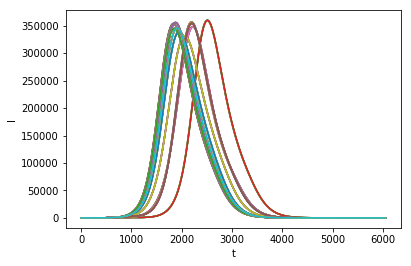

In [34]:
ax = plt.subplot(xlabel='t', ylabel='I',)
for row in filtered.itertuples():
    data = row[1:]
    ax.plot(data)

# ax.set_xlabel('Time of day')
# ax.set_xticklabels(['{:0>2}:00'.format(int(x)) for x in ax.get_xticks()]);
plt.show()

In [38]:
filtered.T.max()

Init_station  Init_time
0             0            347995.168093
              24           348292.848110
              48           348119.294683
              72           347969.481819
              96           347733.277073
              120          347711.718092
              144          347766.325828
1             0            359806.742384
              24           359727.568572
              48           359733.818312
              72           359550.428870
              96           359613.847370
              120          359702.543772
              144          359643.272437
2             0            339719.717386
              24           339506.061577
              48           339517.807665
              72           339438.101174
              96           339315.011572
              120          339222.877161
              144          339464.408014
3             0            353323.149754
              24           354250.118213
              48           353321

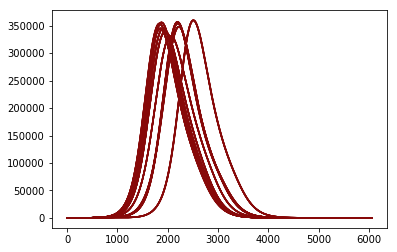

In [52]:
filtered.T.plot(legend=None, color='#870909')